In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns
import ctbenchmark as ctb

# Gaussian peak problem description

In [3]:
problem = ctb.CentralTendencyGaussianPeakProblem10N()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

/home/elias/anaconda3/envs/uqwind/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/elias/anaconda3/envs/uqwind/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


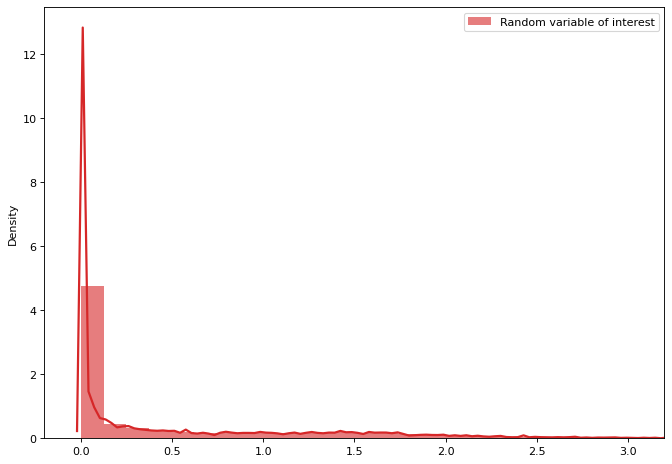

In [4]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = np.array(output_rv.getSample(10000)).flatten()

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'bw':0.01, 'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(output_sample, color="C3", **kwargs, label="Random variable of interest")
plt.xlim(-0.2, 3.2)
plt.legend(loc='best');

# Benchmark

In [8]:
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**12, distribution, None)

In [9]:
#x_bench_sizes = list(range(5, 100, 5)) + list(range(100, 200, 50))
x_bench_sizes = list(range(6, 20, 2)) + list(range(20, 50, 5)) + list(range(50, 100, 10)) + list(range(100, 250, 50))
my_methods = ['kernel herding', 'support points', 'sobol']
bench = ctb.CentralTendencyBenchmark(my_methods, x_bench_sizes)

In [10]:
bench.scale_coefficient = 0.5
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark = df_benchmark.reset_index()
#df_benchmark.to_csv('results/ct_benchmark_{}.csv'.format(problem_name), index=False)

START: problem=Gaussian Peak 10D (normal input) | method=kernel herding
START: problem=Gaussian Peak 10D (normal input) | method=support points
START: problem=Gaussian Peak 10D (normal input) | method=sobol
DONE: problem=Gaussian Peak 10D (normal input) | method=sobol
DONE: problem=Gaussian Peak 10D (normal input) | method=support points
DONE: problem=Gaussian Peak 10D (normal input) | method=kernel herding


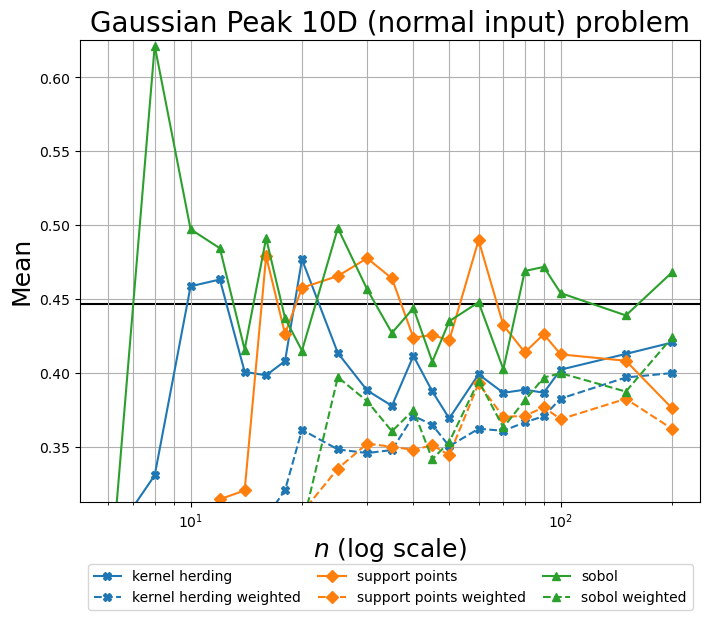

In [11]:
sfile = 'figures/{}_convergence.pdf'.format(problem_name)
#figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods, save_file=sfile);
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=my_methods);

In [14]:
 1 / (300 ** (1 / 2))

0.05773502691896257